### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from scipy import stats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading the data set

In [2]:
df_bike = pd.read_csv('day.csv')
print(df_bike.columns)
print(df_bike.shape)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
(730, 16)


In [3]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### First observation, instant seems like id column, check the same so that we can drop it

In [5]:
df_bike['instant'].nunique()

730

### Basic Mandatory Preprocessing on full dataset before EDA on train set

In [6]:
class basic_preprocessing:
    
    '''
    This code is prepared to apply just the basic preprocessing, such as removing duplicates
    , creating the train and test set and applying the basic conditions as explained in the problem statement
    , such as the year column and weather columns.
    '''
    
    def __init__(self, dataframe, target_var, cols_to_drop):
        self.df = dataframe
        self.target_var = target_var
        self.cols_to_drop = cols_to_drop 
        
    def dedup(self):
        if self.df.duplicated().sum() == 0:
            print('There are no duplicate rows')
            self.df = self.df
        else:
            print('Duplicates dropped')
            self.df = self.df.drop_duplicates(keep = 'last')
        
        
    def drop_id_col(self, df, col):
        print('Total Unique Values: ', df[col].nunique())
        print('Total Rows in DataFrame: ', df.shape[0])
        if df[col].nunique() == df.shape[0]:
            self.df = df.drop(col, axis = 1)
    
    def train_test_split(self):
        self.y = self.df[self.target_var]
        self.X = self.df.drop(self.target_var, axis=1)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y
                                                                                , test_size = 0.2, random_state = 41)
        
        
    def basic_preprocessing(self):
        
        # deduplication
        self.dedup()
        
        # dropping the id column
        self.drop_id_col(self.df, self.cols_to_drop)
        
        # Applying certain conditions which are to be applied to the whole dataset as provided in the question
        mappings_yr = {0:2018, 1:2019}
        mappings_season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
        
        self.df['yr'] = self.df['yr'].map(mappings_yr)
        self.df['season'] = self.df.season.map(mappings_season)
        
        # First and foremost, separating the train and test set as all eda will happen on train set
        # later will define another class for final preprocessing
        self.train_test_split()
        print('The final output data frames are X_train, X_test, y_train, y_test')
        print('Shape of X_train: ', self.X_train.shape)
        print('Shape of X_test: ', self.X_test.shape)
        print('Shape of y_train: ', self.y_train.shape)
        print('Shape of y_test: ', self.y_test.shape)
        return self.X_train, self.X_test, self.y_train, self.y_test

In [7]:
init_preproc_obj = basic_preprocessing(df_bike, 'cnt', 'instant')
X_train, X_test, y_train, y_test = init_preproc_obj.basic_preprocessing()

There are no duplicate rows
Total Unique Values:  730
Total Rows in DataFrame:  730
The final output data frames are X_train, X_test, y_train, y_test
Shape of X_train:  (584, 14)
Shape of X_test:  (146, 14)
Shape of y_train:  (584,)
Shape of y_test:  (146,)


### The whole idea of splitting the train test set here is to have a more robust model. As everything would be based on the training data, if the model performs better in test set, then we can trust the model more

### Exploratory Data Analysis on Train Set
#### Note that there are no null data points, hence we can skip the null treatment part and only later focus on outlier treatment etc for better model training

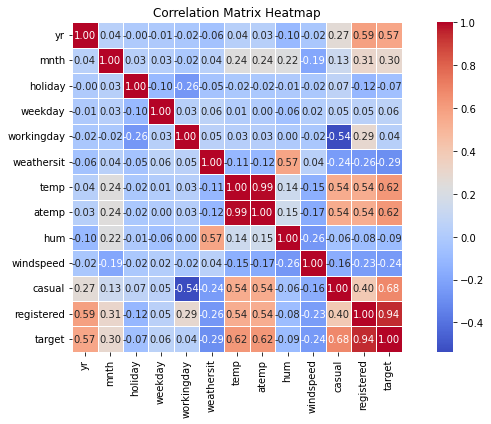

In [8]:
corr_matrix = pd.concat([X_train, y_train.rename('target')], axis=1).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

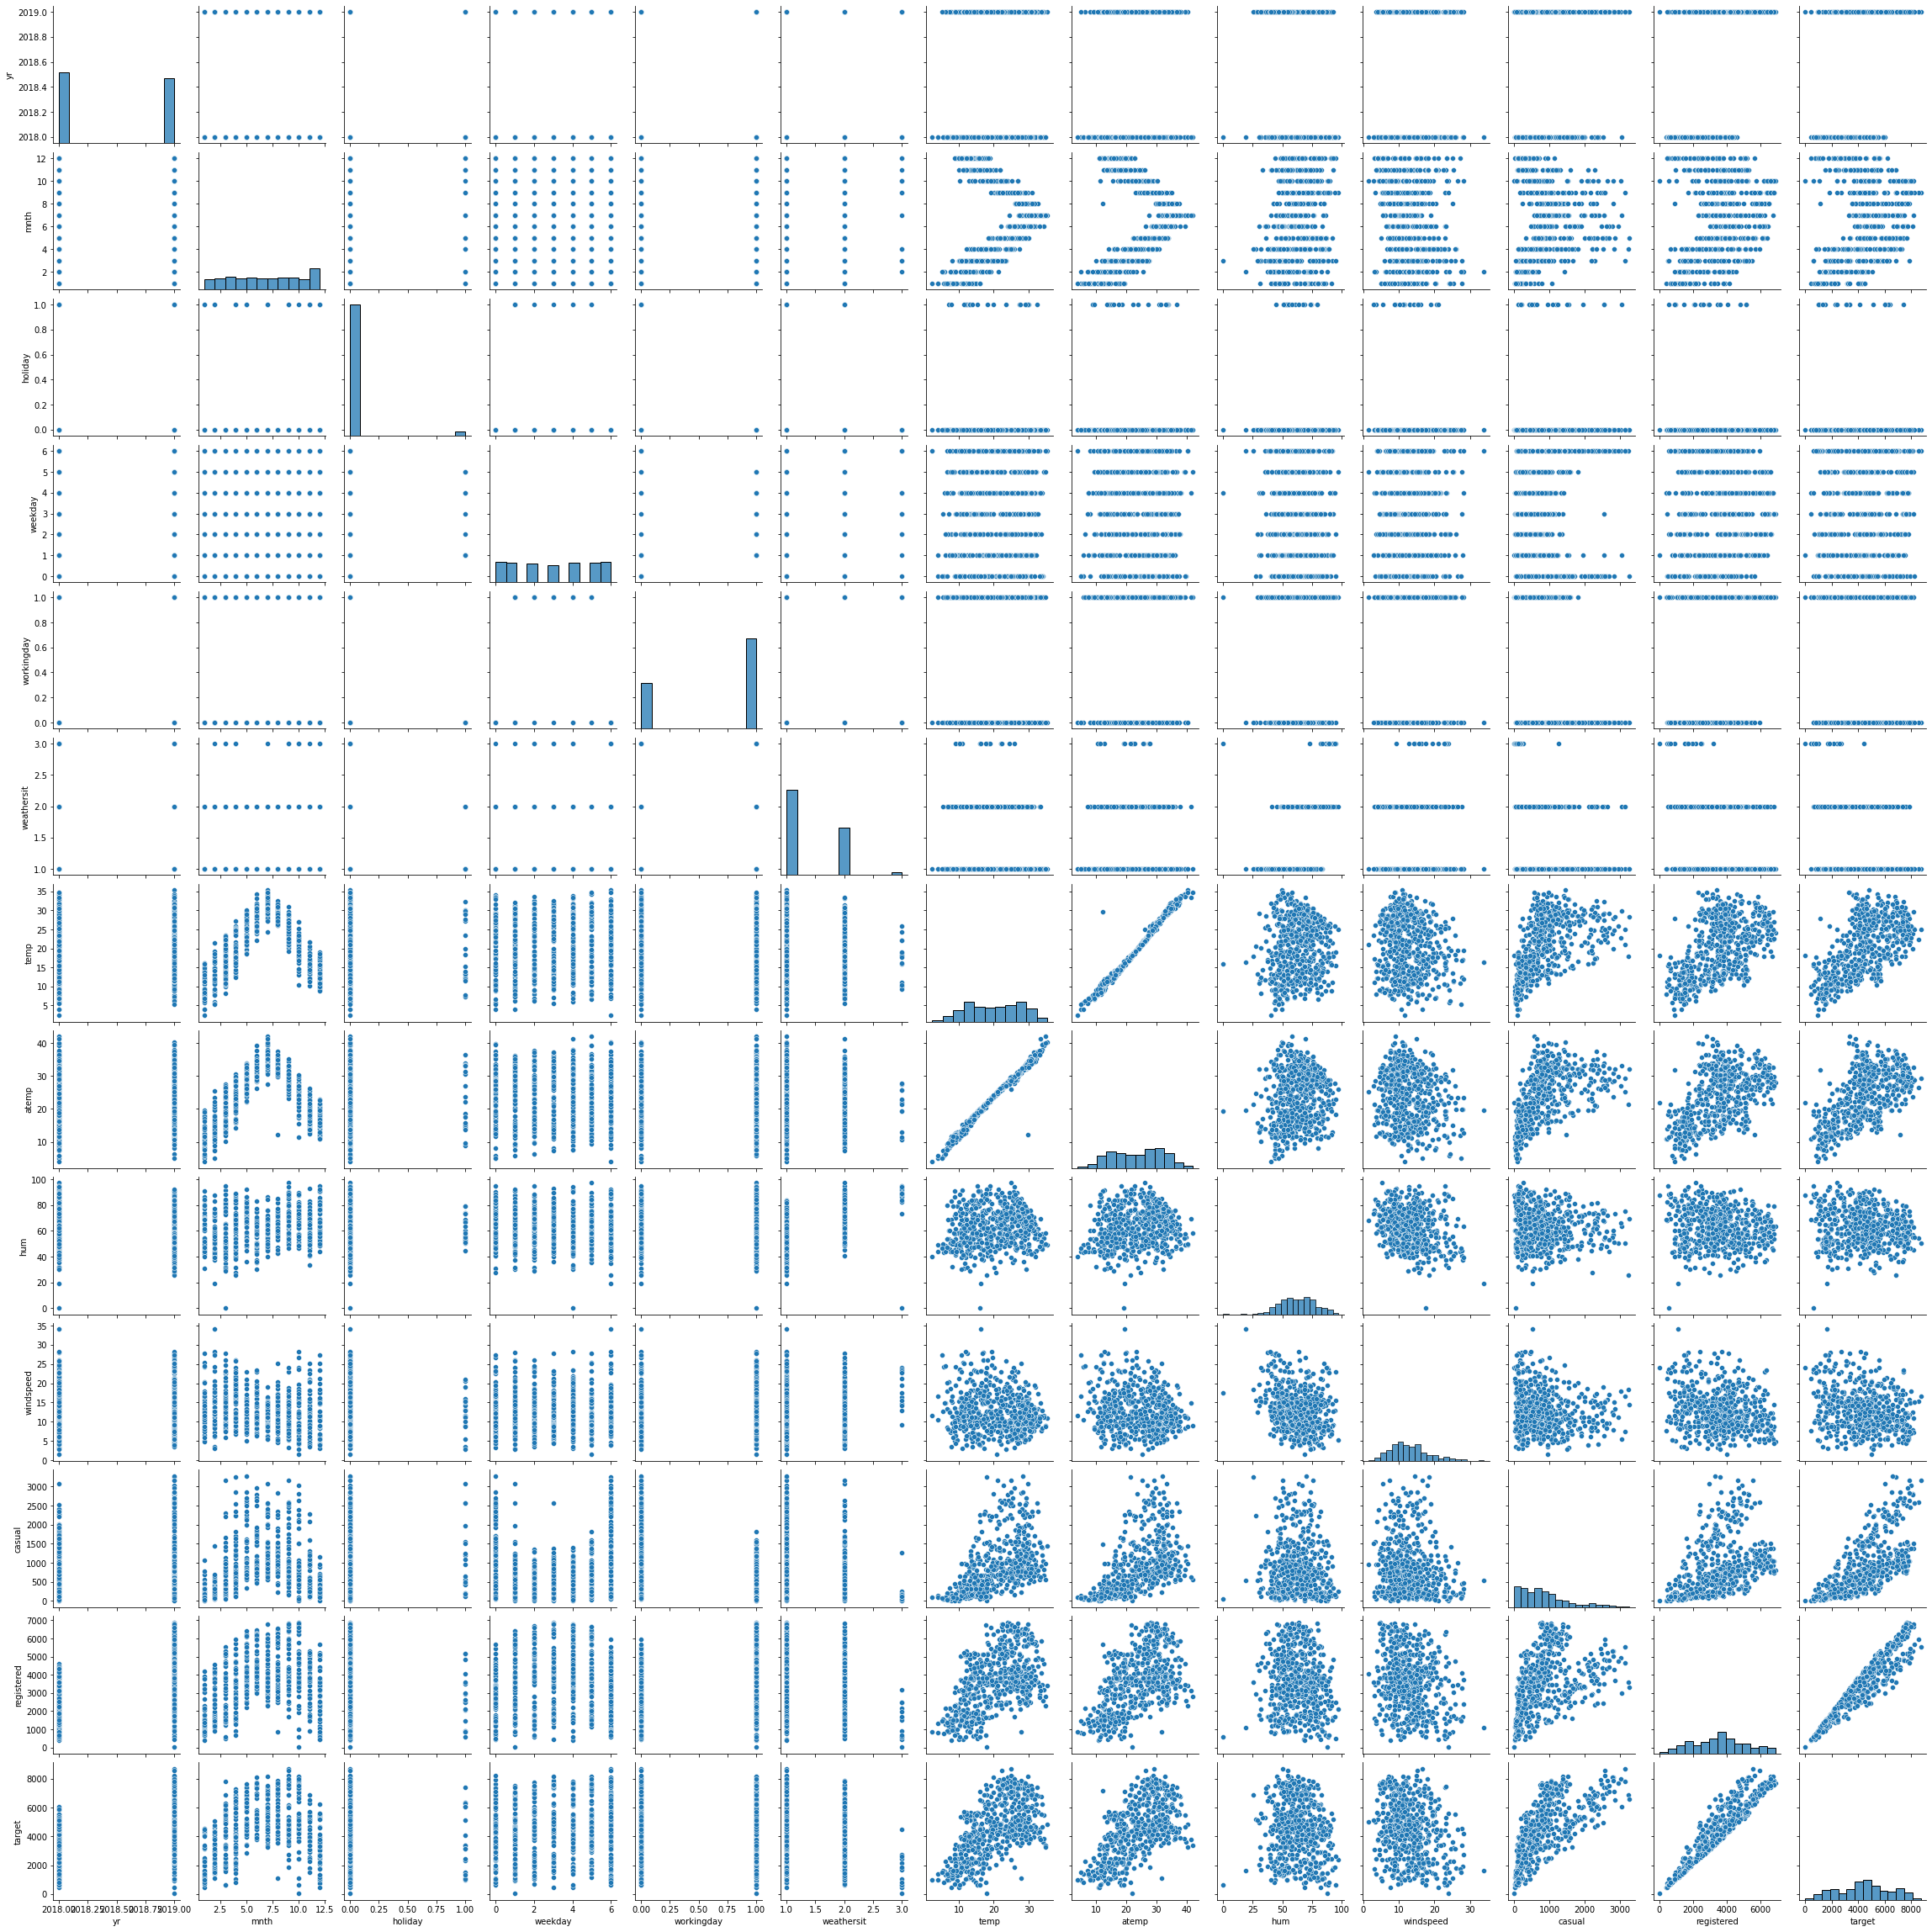

In [9]:
sns.pairplot(pd.concat([X_train, y_train.rename('target')], axis=1))
plt.show()

### Comments
1. At a basic glance, temp and atemp seems to be highly correlated, therefore we can keep one of two
2. Casual and Registered - The total of two columns will give the total demand which is the target variable and seems correlated. It is sensible to remove these two columns because the linear model might just learn the function 1*Casual + 1*Registered = Target Variable.
3. Additionally, on the same given day, we will not have these values of causal and registered when we are doing predictions. Therefore needs to be dropped

In [10]:
X_train.drop(['casual', 'registered'], axis=1, inplace = True)

In [11]:
X_train.describe()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,2018.479452,6.421233,0.032534,3.005137,0.664384,1.395548,20.341491,23.739602,62.668517,12.919053
std,0.500006,3.409797,0.177566,2.041165,0.472610,0.536216,7.499597,8.164450,14.375807,5.254265
min,2018.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244
25%,2018.000000,3.000000,0.000000,1.000000,0.000000,1.000000,13.794799,16.672975,51.786250,9.042119
50%,2018.000000,6.000000,0.000000,3.000000,1.000000,1.000000,20.739153,24.558000,62.708350,12.271217
75%,2019.000000,9.000000,0.000000,5.000000,1.000000,2.000000,26.863538,30.414425,72.979150,15.833842
max,2019.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021


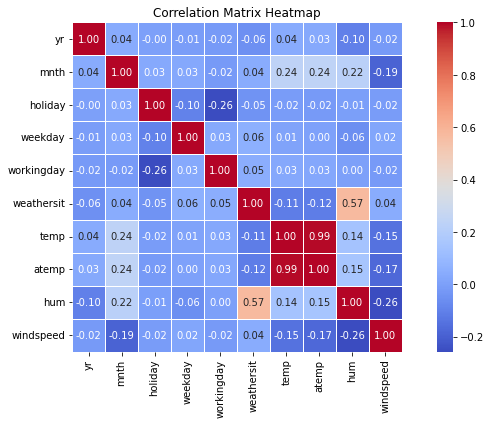

In [12]:
corr_matrix = X_train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

### In terms of correlation between the independent variables, temp and atemp columns are highly correlated. Therefore, we can choose to go with just one variable later. Apart from that, all other variables are lowly correlated.

### Understanding the categorical data against the target variable

In [13]:
X_train.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [14]:
categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
def plot_categorical_vs_target(categorical_vars, data):
    for cat_var in categorical_vars:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=cat_var, y='target', data=data, errorbar=None)
        plt.title(f'Relationship between {cat_var} and Target')
        plt.ylabel('Average Target Value')
        plt.xlabel(cat_var)
        plt.xticks(rotation=90)  # Rotate x-axis labels if needed
        plt.tight_layout()
        plt.show()

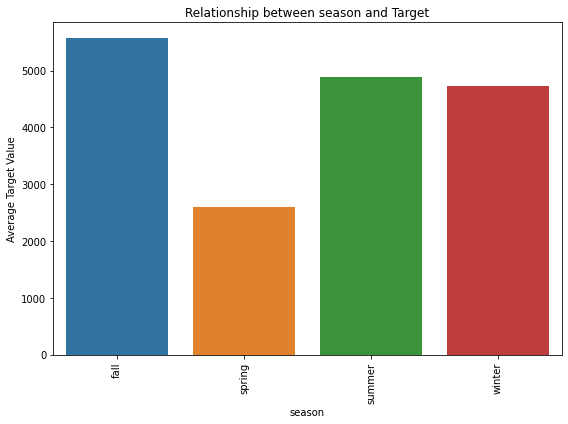

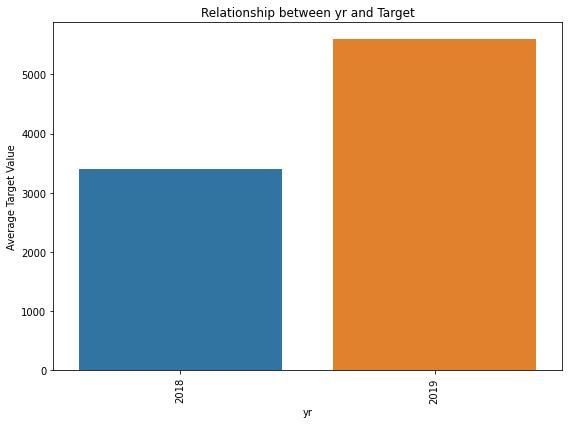

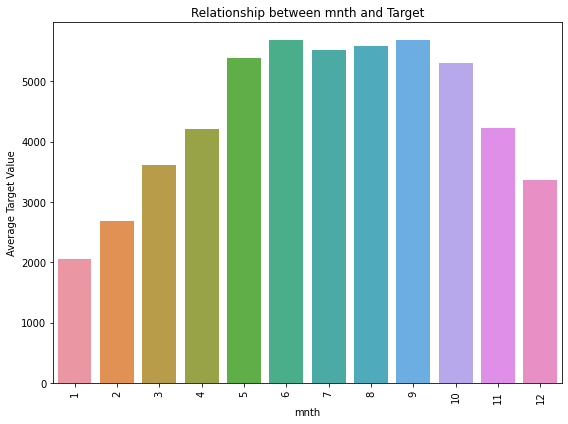

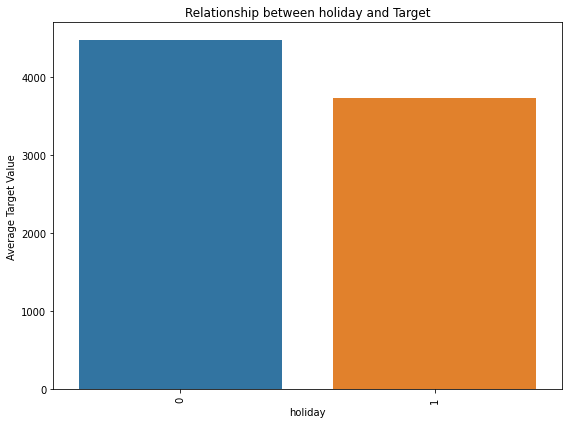

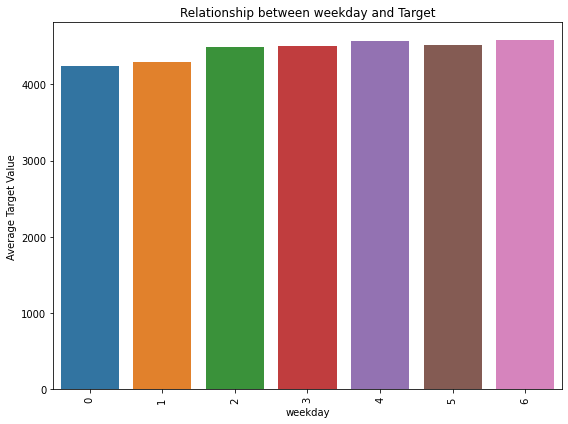

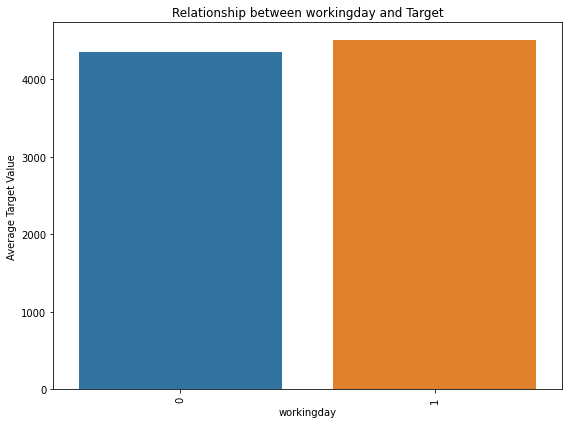

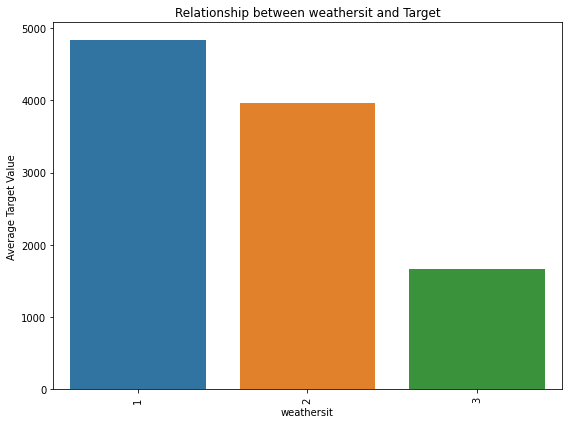

In [15]:
plot_categorical_vs_target(categorical_vars, pd.concat([X_train, y_train.rename('target')], axis=1))

### Generating necessary format for categorical columns and dummification

In [16]:
# Removing holiday and working day column as they are already in binary format
# Weekday can be kept as a categorical column without dummification as it is almost showing an increasing trend
# (based on the graphs above).
categorical_vars_new = ['season', 'yr', 'mnth', 'weathersit']
dummified_categorical_df = pd.get_dummies(X_train[categorical_vars_new].astype(str), drop_first = True)
X_train_dummified = pd.concat([X_train, dummified_categorical_df], axis = 1).drop(categorical_vars_new, axis = 1)
# Dropping temp and keeping atemp, reason being although
X_train_dummified.drop(['dteday', 'temp'], axis = 1, inplace = True)
X_train_dummified.head()

,holiday,weekday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_2,weathersit_3
571,0,4,1,36.96315,59.6667,19.082471,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
725,0,4,1,11.33210,65.2917,23.458911,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
512,1,1,0,33.96500,67.6250,13.166907,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
259,0,6,0,23.92560,71.8333,12.708225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
318,0,2,1,25.37895,68.8750,13.375411,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### Dropped temp and kept atemp column for the following reasons:
1. They are very highly correlated (almost fully - 0.99) and one needs to be dropped
2. Atemp is more related to the temperature felt by people, hence that might impact bike rentals compared to actual temperature (provided later we get data which might not be that highly correlated)

### Creating a similar processed dataset for test set as well for further scaling process

In [17]:
dummified_categorical_df_test = pd.get_dummies(X_test[categorical_vars_new].astype(str), drop_first = True)
X_test_dummified = pd.concat([X_test, dummified_categorical_df_test], axis = 1).drop(categorical_vars_new, axis = 1)
# Dropping temp and keeping atemp, reason being although
X_test_dummified.drop(['dteday', 'temp', 'casual', 'registered'], axis = 1, inplace = True)
X_test_dummified.head()

,holiday,weekday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_2,weathersit_3
20,0,5,1,7.89165,45.7083,23.667214,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
410,0,3,1,17.58145,53.1250,12.167200,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
647,0,3,1,25.15710,63.0833,12.584007,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
208,0,4,1,36.99500,58.3333,11.958093,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
677,0,5,1,17.77065,54.0833,14.375386,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


### Outlier Treatment only for the training set

In [18]:
def detect_outliers_boxplot(data):
    outliers = {}
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    return outliers

# Function to detect outliers based on Z-score criteria
def detect_outliers_zscore(data, threshold=3):
    outliers = {}
    for col in data.columns:
        z_scores = np.abs(stats.zscore(data[col]))
        outliers[col] = len(np.where(z_scores > threshold)[0])
    return outliers

# Function for outlier treatment: You can either remove or cap the outliers
def treat_outliers(data, method='remove', criteria='boxplot', threshold=3):
    if criteria == 'boxplot':
        outliers = detect_outliers_boxplot(data)
        for col in outliers:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            if method == 'remove':
                data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
            elif method == 'cap':
                data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
                data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

    elif criteria == 'zscore':
        for col in data.columns:
            z_scores = np.abs(stats.zscore(data[col]))
            if method == 'remove':
                data = data[z_scores < threshold]
            elif method == 'cap':
                data[col] = np.where(z_scores > threshold, np.sign(data[col]) * threshold * data[col].std(), data[col])
    
    return data

In [19]:
# Detect outliers using both methods
num_cols = ['atemp', 'hum', 'windspeed']
boxplot_outliers = detect_outliers_boxplot(X_train_dummified[num_cols])
zscore_outliers = detect_outliers_zscore(X_train_dummified[num_cols])

# Print outliers count by column
print("Outliers by Boxplot Criteria:", boxplot_outliers)
print("Outliers by Z-score Criteria:", zscore_outliers)

Outliers by Boxplot Criteria: {'atemp': 0, 'hum': 2, 'windspeed': 9}
Outliers by Z-score Criteria: {'atemp': 0, 'hum': 2, 'windspeed': 1}


### Since, we have very few outliers in the data therefore there is not additional need for outlier treatment, we can check the result and then decide if it needs outlier removal

### Rescaling the features

In [20]:
# As a general rule of scaling, using min max scaling as it will take care of outliers
# Secondly the values are positive, therefore min max will limit the range to 0 and 1 which is still on the positive side
scaler = MinMaxScaler()
# note we want scaling only for the numerical variables, we dont want scaling for the categorical variables
# keeping weekday as well as we dont want coefficients to be impacted
num_cols = ['atemp', 'hum', 'windspeed', 'weekday']

X_train_dummified[num_cols] = scaler.fit_transform(X_train_dummified[num_cols])

X_test_dummified[num_cols] = scaler.transform(X_test_dummified[num_cols])

In [21]:
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(pd.DataFrame(y_train))
y_test = scaler_y.transform(pd.DataFrame(y_test))

In [22]:
X_train_scaled = X_train_dummified.copy()
X_test_scaled = X_test_dummified.copy()

In [23]:
X_train_scaled.head()

,holiday,weekday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_2,weathersit_3
571,0,0.666667,1,0.866593,0.613539,0.540995,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
725,0,0.666667,1,0.193709,0.671380,0.675656,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
512,1,0.166667,0,0.787883,0.695373,0.358977,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
259,0,1.000000,0,0.524322,0.738646,0.344863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
318,0,0.333333,1,0.562476,0.708226,0.365392,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [24]:
X_test_scaled.head()

,holiday,weekday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,weathersit_2,weathersit_3
20,0,0.833333,1,0.103388,0.470008,0.682065,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
410,0,0.500000,1,0.357771,0.546272,0.328216,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
647,0,0.500000,1,0.556652,0.648671,0.341041,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
208,0,0.666667,1,0.867429,0.599828,0.321782,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
677,0,0.833333,1,0.362738,0.556126,0.396161,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


## Initial Step - Feature Selection Process via iterative modeling effort using statsmodels

## Training the Model - Base Model

In [25]:
print(y_train.shape, X_train_scaled.shape, y_test.shape, X_test_scaled.shape)

(584, 1) (584, 23) (146, 1) (146, 23)


In [26]:
import statsmodels.api as sm

In [27]:
lr_1 = sm.OLS(y_train, X_train_scaled)

model_lr_1 = lr_1.fit()
model_lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              853.6
Date:                Sat, 23 Nov 2024   Prob (F-statistic):                        0.00
Time:                        22:06:55   Log-Likelihood:                          560.00
No. Observations:                 584   AIC:                                     -1074.
Df Residuals:                     561   BIC:                                     -973.5
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
holiday          -0.0396      0.023     -1.703      0.089      -0.085       0.006
weekday           0.0548      0.011      4.775      0.000       0.032       0.077
workingday        0.0231      0.009      2.706      0.007       0.006       0.040
atemp             0.4340      0.044      9.856      0.000       0.347       0.520
hum              -0.0254      0.033     -0.777      0.438      -0.090       0.039
windspeed        -0.0945      0.025     -3.720      0.000      -0.144      -0.045
season_spring     0.0496      0.021      2.387      0.017       0.009       0.090
season_summer     0.0774      0.023      3.375      0.001       0.032       0.123
season_winter     0.1605      0.023      6.891      0.000       0.115       0.206
yr_2019           0.2418      0.008     30.503      0.000       0.226       0.257
mnth_10           0.1461      0.033      4.477      0.000       0.082       0.210
mnth_11           0.0689      0.030      2.260      0.024       0.009       0.129
mnth_12           0.0538      0.024      2.238      0.026       0.007       0.101
mnth_2            0.0493      0.020      2.492      0.013       0.010       0.088
mnth_3            0.1118      0.021      5.211      0.000       0.070       0.154
mnth_4            0.1450      0.031      4.625      0.000       0.083       0.207
mnth_5            0.1748      0.034      5.133      0.000       0.108       0.242
mnth_6            0.1986      0.034      5.774      0.000       0.131       0.266
mnth_7            0.1750      0.037      4.754      0.000       0.103       0.247
mnth_8            0.2283      0.035      6.614      0.000       0.161       0.296
mnth_9            0.2582      0.031      8.230      0.000       0.197       0.320
weathersit_2     -0.0691      0.010     -6.770      0.000      -0.089      -0.049
weathersit_3     -0.2759      0.028     -9.690      0.000      -0.332      -0.220
==============================================================================
Omnibus:                      116.915   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.526
Skew:                          -0.978   Prob(JB):                     7.56e-72
Kurtosis:                       6.104   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check p-value significance and VIF to finally filter the variable list (select required features)

In [28]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,atemp,39.91
4,hum,30.40
7,season_summer,9.06
8,season_winter,7.88
18,mnth_7,7.26
6,season_spring,7.09
16,mnth_5,6.87
19,mnth_8,6.78
17,mnth_6,6.34
5,windspeed,6.29


In [29]:
# 1 high p high vif remove first
# 2 high p low vif remove second
# 3 check vif, and remove third if high vif for previously low p and high vif
# 4. low p , low vif keep

### This is an iterative process, first we remove hum and holiday which has both high p value and high VIF and then check the VIF and p-value of the model

In [30]:
X_train_scaled.drop(['hum', 'holiday'], axis = 1, inplace = True)
X_test_scaled.drop(['hum', 'holiday'], axis = 1, inplace = True)

In [31]:
lr_2 = sm.OLS(y_train, X_train_scaled)
model_lr2 = lr_2.fit()
model_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              932.2
Date:                Sat, 23 Nov 2024   Prob (F-statistic):                        0.00
Time:                        22:06:55   Log-Likelihood:                          558.18
No. Observations:                 584   AIC:                                     -1074.
Df Residuals:                     563   BIC:                                     -982.6
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
weekday           0.0567      0.011      4.949      0.000       0.034       0.079
workingday        0.0264      0.008      3.198      0.001       0.010       0.043
atemp             0.4137      0.040     10.312      0.000       0.335       0.492
windspeed        -0.0921      0.025     -3.644      0.000      -0.142      -0.042
season_spring     0.0370      0.017      2.199      0.028       0.004       0.070
season_summer     0.0695      0.022      3.226      0.001       0.027       0.112
season_winter     0.1571      0.022      7.024      0.000       0.113       0.201
yr_2019           0.2426      0.008     30.692      0.000       0.227       0.258
mnth_10           0.1389      0.032      4.318      0.000       0.076       0.202
mnth_11           0.0571      0.029      1.938      0.053      -0.001       0.115
mnth_12           0.0461      0.023      1.989      0.047       0.001       0.092
mnth_2            0.0485      0.020      2.450      0.015       0.010       0.087
mnth_3            0.1128      0.021      5.258      0.000       0.071       0.155
mnth_4            0.1432      0.031      4.573      0.000       0.082       0.205
mnth_5            0.1736      0.034      5.109      0.000       0.107       0.240
mnth_6            0.2004      0.034      5.824      0.000       0.133       0.268
mnth_7            0.1713      0.036      4.695      0.000       0.100       0.243
mnth_8            0.2236      0.034      6.631      0.000       0.157       0.290
mnth_9            0.2500      0.030      8.292      0.000       0.191       0.309
weathersit_2     -0.0735      0.008     -8.669      0.000      -0.090      -0.057
weathersit_3     -0.2827      0.027    -10.622      0.000      -0.335      -0.230
==============================================================================
Omnibus:                      122.233   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.480
Skew:                          -1.019   Prob(JB):                     1.57e-75
Kurtosis:                       6.162   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,atemp,33.04
5,season_summer,7.96
6,season_winter,7.25
16,mnth_7,7.11
14,mnth_5,6.82
17,mnth_8,6.46
15,mnth_6,6.33
3,windspeed,6.21
13,mnth_4,5.35
18,mnth_9,5.16


### Final Iteration with Statsmodels library and removing variables with VIF > 5

In [33]:
X_train_fe = X_train_scaled.copy()
X_train_fe = X_train_fe.drop(['atemp', 'season_summer', 'season_winter', 'mnth_7', 'mnth_5', 'mnth_8', 'mnth_6', 'windspeed'], axis = 1)
X_test_fe = X_test_scaled.copy()
X_test_fe = X_test_fe.drop(['atemp', 'season_summer', 'season_winter', 'mnth_7', 'mnth_5', 'mnth_8', 'mnth_6', 'windspeed'], axis = 1)

In [34]:
lr_3 = sm.OLS(y_train, X_train_fe)
model_lr3 = lr_3.fit()
model_lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              291.5
Date:                Sat, 23 Nov 2024   Prob (F-statistic):                   4.81e-242
Time:                        22:06:55   Log-Likelihood:                          107.25
No. Observations:                 584   AIC:                                     -188.5
Df Residuals:                     571   BIC:                                     -131.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
weekday           0.2967      0.022     13.745      0.000       0.254       0.339
workingday        0.1986      0.016     12.614      0.000       0.168       0.230
season_spring    -0.1727      0.025     -6.802      0.000      -0.223      -0.123
yr_2019           0.3691      0.016     23.333      0.000       0.338       0.400
mnth_10           0.1531      0.033      4.574      0.000       0.087       0.219
mnth_11           0.0222      0.033      0.677      0.498      -0.042       0.087
mnth_12          -0.0006      0.032     -0.017      0.986      -0.064       0.063
mnth_2            0.0282      0.039      0.728      0.467      -0.048       0.104
mnth_3            0.0657      0.032      2.033      0.043       0.002       0.129
mnth_4            0.0802      0.031      2.578      0.010       0.019       0.141
mnth_9            0.2139      0.031      6.922      0.000       0.153       0.275
weathersit_2     -0.0111      0.018     -0.626      0.532      -0.046       0.024
weathersit_3     -0.2984      0.056     -5.317      0.000      -0.409      -0.188
==============================================================================
Omnibus:                        5.355   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.582
Skew:                           0.161   Prob(JB):                       0.0614
Kurtosis:                       3.354   Cond. No.                         7.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
y_pred = model_lr3.predict(X_test_fe)

In [36]:
r2_score(y_train, model_lr3.predict(X_train_fe))

0.1780557341817134

In [37]:
r2_score(y_test, y_pred)

0.3878534993676668

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.17437703095070112

### Using SKLearn Library and RFE for final feature selection

In [39]:
lm = LinearRegression()

lm.fit(X_train_scaled, y_train)



LinearRegression()

In [40]:
rfe = RFE(lm, n_features_to_select=10, step = 1)


In [41]:
rfe = rfe.fit(X_train_scaled, y_train)

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('weekday', False, 7),
 ('workingday', False, 9),
 ('atemp', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', False, 4),
 ('yr_2019', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 11),
 ('mnth_2', False, 8),
 ('mnth_3', True, 1),
 ('mnth_4', False, 5),
 ('mnth_5', False, 2),
 ('mnth_6', True, 1),
 ('mnth_7', False, 6),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [42]:
ranking = pd.DataFrame(list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_)))
ranking.columns = ['feature', 'support', 'ranking']
ranking.sort_values(by = 'ranking', ascending = True)

,feature,support,ranking
20,weathersit_3,True,1
18,mnth_9,True,1
2,atemp,True,1
3,windspeed,True,1
4,season_spring,True,1
7,yr_2019,True,1
8,mnth_10,True,1
19,weathersit_2,True,1
15,mnth_6,True,1
12,mnth_3,True,1


### Final Model

In [43]:
ranking[ranking['ranking'].isin([1,2])]['feature'].to_list()

['atemp',
 'windspeed',
 'season_spring',
 'yr_2019',
 'mnth_10',
 'mnth_3',
 'mnth_5',
 'mnth_6',
 'mnth_9',
 'weathersit_2',
 'weathersit_3']

In [44]:
X_test_fe.columns

Index(['weekday', 'workingday', 'season_spring', 'yr_2019', 'mnth_10',
       'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_9',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [45]:
# Based on both the processes involved, planning to keep atemp. Reason is based 
# on business understanding of people renting a bike, temperature (feeling) might be a factor
final_vars = ['atemp',
 'windspeed',
 'season_spring',
 'yr_2019',
 'mnth_10',
 'mnth_3',
 'mnth_5',
 'mnth_6',
 'mnth_9',
 'weathersit_2',
 'weathersit_3',
     'weekday', 'workingday']
final_vars

['atemp',
 'windspeed',
 'season_spring',
 'yr_2019',
 'mnth_10',
 'mnth_3',
 'mnth_5',
 'mnth_6',
 'mnth_9',
 'weathersit_2',
 'weathersit_3',
 'weekday',
 'workingday']

In [46]:
X_train_final = X_train_scaled.copy()
X_train_final = X_train_final[final_vars]

X_test_final = X_test_scaled.copy()
X_test_final = X_test_final[final_vars]

In [47]:
lm_final = LinearRegression()

lm_final.fit(X_train_final, y_train)

LinearRegression()

In [52]:
print(lm_final.coef_)
print(X_train_final.columns)

[[ 0.35773446 -0.12852778 -0.14368957  0.23905971  0.08787177  0.04141228
   0.04078001  0.05078925  0.08804521 -0.07722832 -0.29008199  0.04502528
   0.02024052]]
Index(['atemp', 'windspeed', 'season_spring', 'yr_2019', 'mnth_10', 'mnth_3',
       'mnth_5', 'mnth_6', 'mnth_9', 'weathersit_2', 'weathersit_3', 'weekday',
       'workingday'],
      dtype='object')


### Checking performance on Train Set

In [48]:
y_pred_train = lm_final.predict(X_train_final)
print('R2 Score on Train Set: ', r2_score(y_train, y_pred_train))
print('RMSE on Train Set:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

R2 Score on Train Set:  0.8277297687254865
RMSE on Train Set: 0.09219108577233028


### Residual Analysis and Predictions on Test Set

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:ylabel='Density'>

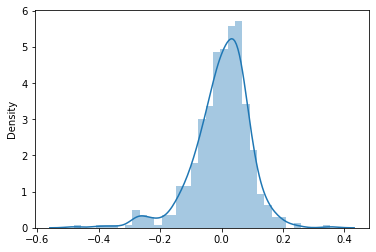

In [49]:
res = y_train - y_pred_train
sns.distplot(res)

### As we can see the residuals are normally distributed, therefore, we can say that the assumptions of linear regression holds true and we can go ahead with the prediction for the test set.

### Checking performance on Test Set

In [50]:
y_pred_test = lm_final.predict(X_test_final)
print('R2 Score on Test Set: ', r2_score(y_test, y_pred_test))
print('RMSE on Test Set: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 Score on Test Set:  0.8564125894299823
RMSE on Test Set:  0.08445391271099878


### This data is scaled,  for the company, business to eventually check and understand the exact values we can return the final output/predictions using scaler_y.inverse_transform() which will give the value in their desired and easy to understand format

In [51]:
# This is an important snippet to be leveraged for business before sharing the numbers
y_pred_test_absolute_val = scaler_y.inverse_transform(y_pred_test)
y_pred_test_absolute_val

array([[ 1119.68417524],
       [ 4253.43198959],
       [ 6870.24260293],
       [ 5081.63444344],
       [ 5572.37423672],
       [ 5100.52100326],
       [ 4561.97188923],
       [ 4310.74621845],
       [ 3601.87943817],
       [ 2977.51915634],
       [ 6447.5837369 ],
       [ 1254.27019986],
       [ 5639.12931334],
       [ 7192.92488274],
       [ 3781.45187087],
       [ 2801.89036847],
       [ 2649.27004219],
       [ 5416.75395867],
       [ 4860.77388126],
       [ 6189.78733269],
       [ 7607.4657089 ],
       [ 2984.60713177],
       [ 2359.37992013],
       [ 6411.20843933],
       [ 1460.12015191],
       [ 3680.95772867],
       [ 4893.65072327],
       [ 5181.30731179],
       [ 5809.87654854],
       [ 3624.54055999],
       [ 4490.930294  ],
       [ 1268.48960406],
       [ 6862.3178748 ],
       [ 6709.20490675],
       [ 5456.06286777],
       [ 6112.86864386],
       [ 5502.3061699 ],
       [ 7207.93463402],
       [ 7041.5566154 ],
       [ 4884.80197544],


### Therefore, the final model is lm_final which can be stored as a pickle file and can be used to predict whenever required.
1. y_pred_test_absolute is the predicted numbers on test set as actual numbers in easily consumable format by business
2. Whenever business wants to view the output, the tech team can use the model to predict and then use scaler_y.inverse_transform() to return absolute/actual numbers to the business
3. r2 score of around 82% and 85% on train and test set respectively shows that with just 13 variables, we are able to explain around 80+% of the variance in the data and there is no overfitting as such
4. rmse is also comparatively lesser and have less difference b/w train and test set